In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
df=pd.read_csv('/Users/jeong-yula/Downloads/open/train.csv')
df.head()

/var/folders/p6/zn1thsjj39x22wz5h1vhtxlh0000gn/T/ipykernel_22850/822009665.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
X = df.drop('대출등급', axis=1)
y = df['대출등급']

from sklearn.model_selection import train_test_split

X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

numeric_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적']

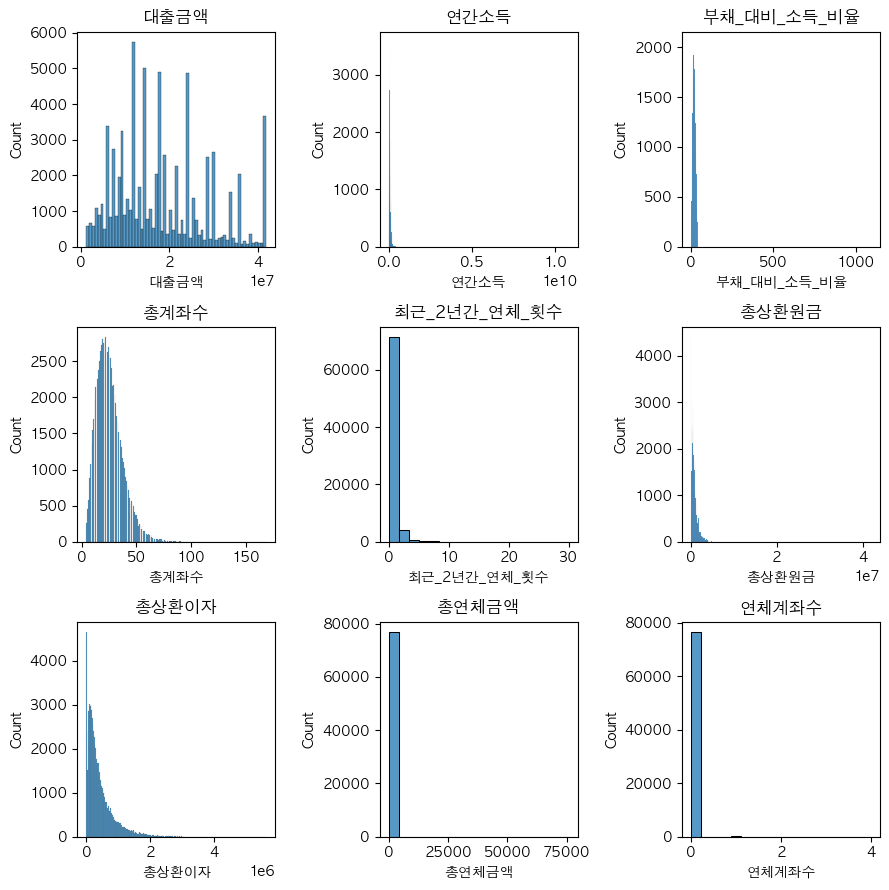

In [4]:
def get_3_hist(data:pd.DataFrame, columns:list):
    
    plt.figure(figsize=(9, 9))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(3, 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

get_3_hist(X_train, numeric_col)

근로기간 label encoding

In [5]:
def year_encoder(x):
    output = x.replace('years', '')
    output = output.replace('year', '')
    output = output.replace('+', '')
    output = output.replace('<', '')
    output = output.replace('Unknown', '-1').strip()
    output = int(output)

    return output

In [6]:
df['근로기간'] = df['근로기간'].apply(year_encoder)

주택소유상태


In [7]:
drop_index = df[df['주택소유상태'] == 'ANY'].index

df = df.drop(drop_index)

In [8]:
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,-1,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [9]:
df['주택소유상태'].unique()

array(['RENT', 'MORTGAGE', 'OWN'], dtype=object)

In [10]:
df['대출기간'].unique()
df['대출목적'].unique()

array(['부채 통합', '주택 개선', '주요 구매', '휴가', '의료', '자동차', '신용 카드', '소규모 사업',
       '기타', '이사', '주택', '재생 에너지'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le= LabelEncoder()
oe=OneHotEncoder()

In [12]:
oe.fit(df[['주택소유상태']])

OneHotEncoder()

In [13]:
oe.categories_

[array(['MORTGAGE', 'OWN', 'RENT'], dtype=object)]

In [14]:
oe.transform(df[['주택소유상태']])

<96293x3 sparse matrix of type '<class 'numpy.float64'>'
	with 96293 stored elements in Compressed Sparse Row format>

In [19]:
house_csr=oe.transform(df[['주택소유상태']])
house_csr_df=pd.DataFrame(house_csr.toarray(), columns=oe.get_feature_names_out())
house_csr_df.head()

,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [20]:
pd.concat([df,house_csr_df],axis=1)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT
0,TRAIN_00000,12480000.0,36 months,6.0,RENT,72000000.0,18.90,15.0,부채 통합,0.0,0.0,0.0,0.0,0.0,C,0.0,0.0,1.0
1,TRAIN_00001,14400000.0,60 months,10.0,MORTGAGE,130800000.0,22.33,21.0,주택 개선,0.0,373572.0,234060.0,0.0,0.0,B,1.0,0.0,0.0
2,TRAIN_00002,12000000.0,36 months,5.0,MORTGAGE,96000000.0,8.60,14.0,부채 통합,0.0,928644.0,151944.0,0.0,0.0,A,1.0,0.0,0.0
3,TRAIN_00003,14400000.0,36 months,8.0,MORTGAGE,132000000.0,15.09,15.0,부채 통합,0.0,325824.0,153108.0,0.0,0.0,C,1.0,0.0,0.0
4,TRAIN_00004,18000000.0,60 months,-1.0,RENT,71736000.0,25.39,19.0,주요 구매,0.0,228540.0,148956.0,0.0,0.0,B,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96290,TRAIN_96290,28800000.0,60 months,10.0,MORTGAGE,132000000.0,5.16,25.0,주택 개선,0.0,583728.0,855084.0,0.0,0.0,E,1.0,0.0,0.0
96291,TRAIN_96291,14400000.0,36 months,1.0,MORTGAGE,84000000.0,11.24,22.0,신용 카드,0.0,1489128.0,241236.0,0.0,0.0,A,1.0,0.0,0.0
96292,TRAIN_96292,15600000.0,36 months,5.0,MORTGAGE,66330000.0,17.30,21.0,부채 통합,2.0,1378368.0,818076.0,0.0,0.0,D,0.0,0.0,1.0
96293,TRAIN_96293,8640000.0,36 months,10.0,RENT,50400000.0,11.80,14.0,신용 카드,0.0,596148.0,274956.0,0.0,0.0,C,NaN,NaN,NaN


In [24]:
oe1=OneHotEncoder()

In [26]:
oe1.fit(df[['대출기간']])


OneHotEncoder()

In [27]:
oe1.transform(df[['대출기간']])

<96293x2 sparse matrix of type '<class 'numpy.float64'>'
	with 96293 stored elements in Compressed Sparse Row format>

In [30]:
period_csr=oe1.transform(df[['대출기간']])
period_csr_df=pd.DataFrame(period_csr.toarray(), columns=oe1.get_feature_names_out())
period_csr_df.head()

,대출기간_ 36 months,대출기간_ 60 months
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [31]:
pd.concat([df,period_csr_df],axis=1)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,대출기간_ 36 months,대출기간_ 60 months
0,TRAIN_00000,12480000.0,36 months,6.0,RENT,72000000.0,18.90,15.0,부채 통합,0.0,0.0,0.0,0.0,0.0,C,1.0,0.0
1,TRAIN_00001,14400000.0,60 months,10.0,MORTGAGE,130800000.0,22.33,21.0,주택 개선,0.0,373572.0,234060.0,0.0,0.0,B,0.0,1.0
2,TRAIN_00002,12000000.0,36 months,5.0,MORTGAGE,96000000.0,8.60,14.0,부채 통합,0.0,928644.0,151944.0,0.0,0.0,A,1.0,0.0
3,TRAIN_00003,14400000.0,36 months,8.0,MORTGAGE,132000000.0,15.09,15.0,부채 통합,0.0,325824.0,153108.0,0.0,0.0,C,1.0,0.0
4,TRAIN_00004,18000000.0,60 months,-1.0,RENT,71736000.0,25.39,19.0,주요 구매,0.0,228540.0,148956.0,0.0,0.0,B,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96290,TRAIN_96290,28800000.0,60 months,10.0,MORTGAGE,132000000.0,5.16,25.0,주택 개선,0.0,583728.0,855084.0,0.0,0.0,E,1.0,0.0
96291,TRAIN_96291,14400000.0,36 months,1.0,MORTGAGE,84000000.0,11.24,22.0,신용 카드,0.0,1489128.0,241236.0,0.0,0.0,A,1.0,0.0
96292,TRAIN_96292,15600000.0,36 months,5.0,MORTGAGE,66330000.0,17.30,21.0,부채 통합,2.0,1378368.0,818076.0,0.0,0.0,D,1.0,0.0
96293,TRAIN_96293,8640000.0,36 months,10.0,RENT,50400000.0,11.80,14.0,신용 카드,0.0,596148.0,274956.0,0.0,0.0,C,NaN,NaN


In [33]:
df.loc[df['ID']=='TRAIN_96293']

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
96293,TRAIN_96293,8640000,36 months,10,RENT,50400000,11.8,14,신용 카드,0,596148,274956.0,0.0,0.0,C


In [ ]:
# df.loc[df['ID']=='TRAIN_96293'] --주택 any

In [34]:
oe2=OneHotEncoder()

In [35]:
oe2.fit(df[['대출목적']])


OneHotEncoder()

In [36]:
oe2.transform(df[['대출목적']])

<96293x12 sparse matrix of type '<class 'numpy.float64'>'
	with 96293 stored elements in Compressed Sparse Row format>

In [37]:
purpose_csr=oe2.transform(df[['대출목적']])
purpose_csr_df=pd.DataFrame(purpose_csr.toarray(), columns=oe2.get_feature_names_out())
purpose_csr_df.head()

,대출목적_기타,대출목적_부채 통합,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
pd.concat([df,purpose_csr_df],axis=1)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,TRAIN_00000,12480000.0,36 months,6.0,RENT,72000000.0,18.90,15.0,부채 통합,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAIN_00001,14400000.0,60 months,10.0,MORTGAGE,130800000.0,22.33,21.0,주택 개선,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRAIN_00002,12000000.0,36 months,5.0,MORTGAGE,96000000.0,8.60,14.0,부채 통합,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAIN_00003,14400000.0,36 months,8.0,MORTGAGE,132000000.0,15.09,15.0,부채 통합,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN_00004,18000000.0,60 months,-1.0,RENT,71736000.0,25.39,19.0,주요 구매,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96290,TRAIN_96290,28800000.0,60 months,10.0,MORTGAGE,132000000.0,5.16,25.0,주택 개선,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96291,TRAIN_96291,14400000.0,36 months,1.0,MORTGAGE,84000000.0,11.24,22.0,신용 카드,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96292,TRAIN_96292,15600000.0,36 months,5.0,MORTGAGE,66330000.0,17.30,21.0,부채 통합,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96293,TRAIN_96293,8640000.0,36 months,10.0,RENT,50400000.0,11.80,14.0,신용 카드,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
